## Project Name: Summer Olympics Analysis
- Analysis using SQL and data available in MySql database.

- Sports goes into entertainment category as far as viewers are concerned.
- Olympic athletes are considered as benchmarks in regards with their Strength, Agility and Intelligence.

### Project goal:
- To explore a dataset available in MySql database on the modern Summer Olympic Games - Athens data from 1896 to Rio 2016.
- In this project, I investigate on the results and understand trends of Olympics results using SQL.
- I will use SQL and MySql connector to fetch data from database and perform analysis and answer some common questions on the Summer Olympics.

### Dataset:
- Dataset have records at an individual Athlete competing in an individual Olympic events. 
- Columns as Name, Age, Medal_Won, Game, Year, and so on.

### Using summer olympics dataset we try to find out following questions answer:

- Q.1 Find the oldest year of Olympics and and find out count of sports played in that year ?
- Q.2 Find the latest year of olympics and and find count of countries played in that year ?
- Q.3 Which year saw the highest and lowest no of countries participating in olympics?
- Q.4 Which nation has participated in all of the olympic games?
- Q.5 Identify the sport which was played in all summer olympics? 
- Q.6. Which Sports were just played only once in the olympics?
- Q.7  Fetch oldest athletes olympic year to win a gold medal?
- Q.8 Fetch the top 5 athletes who have won the most medals (gold/silver/bronze)?
- Q.9 Fetch the top 5 most successful countries in olympics. Success is defined by no of medals won?
- Q.10 In which Sport/event, India has won highest medal?
- Q.11 List top 15 down total gold, silver and bronze medals won by each country corresponding to each olympic games?

### Phase 1: Data Collection

 ##### We are using two tables which are available at MySQL database:
 - **olympics_history** table where each row corresponds to an individual athlete competing in an individual Olympic event.
 - **olympics_history_noc_regions** contains NOC(National Olympic Committee  a 3-letter code) which helps us to add country information and its correspondion region from its NOC code.

In [2]:
# importing Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
%matplotlib inline

### Phase 2: Data Understanding

In [3]:
# Connecting to MySql Database
import mysql.connector
mydb=mysql.connector.connect(
host="localhost",
user="root",
password="Sangeeta@4820",
use_pure=True)

In [4]:
## Query to read first 10 rows of table.
query = '''SELECT * FROM Olympics.olympics_history LIMIT 10'''

In [5]:
olympics_history_df = pd.read_sql_query(query, mydb)

In [6]:
olympics_history_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
2,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
3,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA


In [7]:
## Query to read first 10 rows of table.
query ='''SELECT * FROM Olympics.olympics_history_noc_regions LIMIT 10'''

In [8]:
olympics_history_noc_regions_df = pd.read_sql_query(query, mydb)

In [9]:
olympics_history_noc_regions_df.head()

,NOC,region,notes
0,AFG,Afghanistan,
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,
3,ALG,Algeria,
4,AND,Andorra,


### Query to geta all column names in table:

In [10]:
query='''
        SELECT 
            COLUMN_NAME 
        FROM 
            INFORMATION_SCHEMA.COLUMNS 
        WHERE 
            TABLE_SCHEMA='Olympics' 
            AND TABLE_NAME='olympics_history';
    '''

In [11]:
olympics_histoty_data = pd.read_sql_query(query, mydb)

In [12]:
olympics_histoty_data

,COLUMN_NAME
0,ID
1,Name
2,Sex
3,Age
4,Height
5,Weight
6,Team
7,NOC
8,Games
9,Year


### Observation:

#### olympics_history table

1. Id:
    - Represents unique number for each athlete.
2. Name:
    - Represents name of the athlete.
3. Sex:
    - Represents sex of athlete.
    - M for Male ,F for female
4. Age:
    - Represents age of an athlete 
5. Height:
    - Represents height of an athlete in cm.
    - It has 51402 null values.
6. Weight:
    - Represents Weight of an athlete in kg.
    - It has 54074 null values.
7. Team:
    - Represents for which team an athelete was playing.
8. NOC:
    - Represents National Olympic Committee which is 3-letter code.
9. Games:
    - Represents year and season olympic games was hosted.
10. Year:
    - Represnts for which year olympic games was hosted.
11. Season:
    - reprsents for which season olympic games was hosted.
12. City:
    - Represents host city for respective olympic games.
13. Sport:
    - Represents Sport played by each athlete in olympic games.
14. Event:
    - Represents event name with respect to each game.
15. Medal:
    - Represents  type of medal won by each athlete.
    - It contains gold,silver,bronze medals.
    - NA represnts no medal won by the athlete.
    - There are 222153 null values.

#### olympics_history_noc_regions table
1. NOC:
 - Represents National Olympic Committee which is 3-letter code.
2. region:
  - Represents in which region olympic games was hosted.
3. notes:
 - Represents some additional notes with respect to every region.

### Query to get Null values in each columns:

In [13]:
query='''

WITH column_name_cte AS
(
    SELECT 
        COLUMN_NAME
    FROM 
        INFORMATION_SCHEMA.COLUMNS
    WHERE 
        TABLE_NAME = 'olympics_history'
),
count_null_values AS 
(
    SELECT 'id' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE ID ='NA'
    UNION 
    SELECT 'name' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Name ='NA'
    UNION 
    SELECT 'sed' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Sex ='Na'
    UNION 
    SELECT 'age' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Age ='Na'
    UNION 
    SELECT 'height' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Height ='Na'
    UNION 
    SELECT 'weight' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Weight ='Na'
    UNION 
    SELECT 'team' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Team ='Na'
    UNION 
    SELECT 'noc' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE NOC ='Na'
    UNION 
    SELECT 'games' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Games ='Na'
    UNION 
    SELECT 'year' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Year ='Na'
    UNION 
    SELECT 'season' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Season ='Na'
    UNION 
    SELECT 'city' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE City ='Na'
    UNION 
    SELECT 'sport' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Sport ='Na'
    UNION 
    SELECT 'event' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Event ='Na'
    UNION 
    SELECT 'medal' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Medal ='Na'

)
SELECT 
    * 
FROM count_null_values
'''

In [14]:
olympics_histoty_data = pd.read_sql_query(query, mydb)

In [15]:
olympics_histoty_data

,col_name,null_values
0,id,0
1,name,0
2,sed,0
3,age,0
4,height,51402
5,weight,54074
6,team,0
7,noc,0
8,games,0
9,year,0


### Phase 3: Data Querying using SQL:

#### Q.1 Find the oldest year of Olympics and and find out count of sports played in that year ?

- What do you mean by oldest year - oldest year of athelits or omplypics?
- Question contains count in query there is no count? - what actually you want to count?
- you did count using pandas better keep it as its but add query that will give same result which pandas is doing.
- Write clear question?

In [16]:
# query = '''
#             SELECT 
#                 Name AS name,
#                 Sex AS sex,
#                 Team AS country,
#                 Year AS year,
#                 Season As season,
#                 Sport AS sport
#             FROM 
#                 Olympics.olympics_history 
#             WHERE 
#                 Year = (SELECT 
#                             min(Year)
#                         FROM Olympics.olympics_history
#                         )
#         '''

In [17]:
query = '''
        WITH min_year_data AS (
            SELECT 
                Name AS name,
                Sex AS sex,
                Team AS country,
                Year AS year,
                Season AS season,
                Sport AS sport
            FROM
                Olympics.olympics_history
            WHERE
                Year = (SELECT  MIN(Year) FROM Olympics.olympics_history)
            )
            SELECT
                sport,
                COUNT(*) AS number_sports
            FROM
                min_year_data
            GROUP BY 1
            ORDER BY 2 desc
        '''

In [18]:
olympics_data = pd.read_sql_query(query, mydb)

In [19]:
olympics_data

,sport,number_sports
0,Gymnastics,73
1,Athletics,69
2,Cycling,19
3,Shooting,19
4,Tennis,15
5,Swimming,7
6,Fencing,6
7,Weightlifting,6
8,Wrestling,3


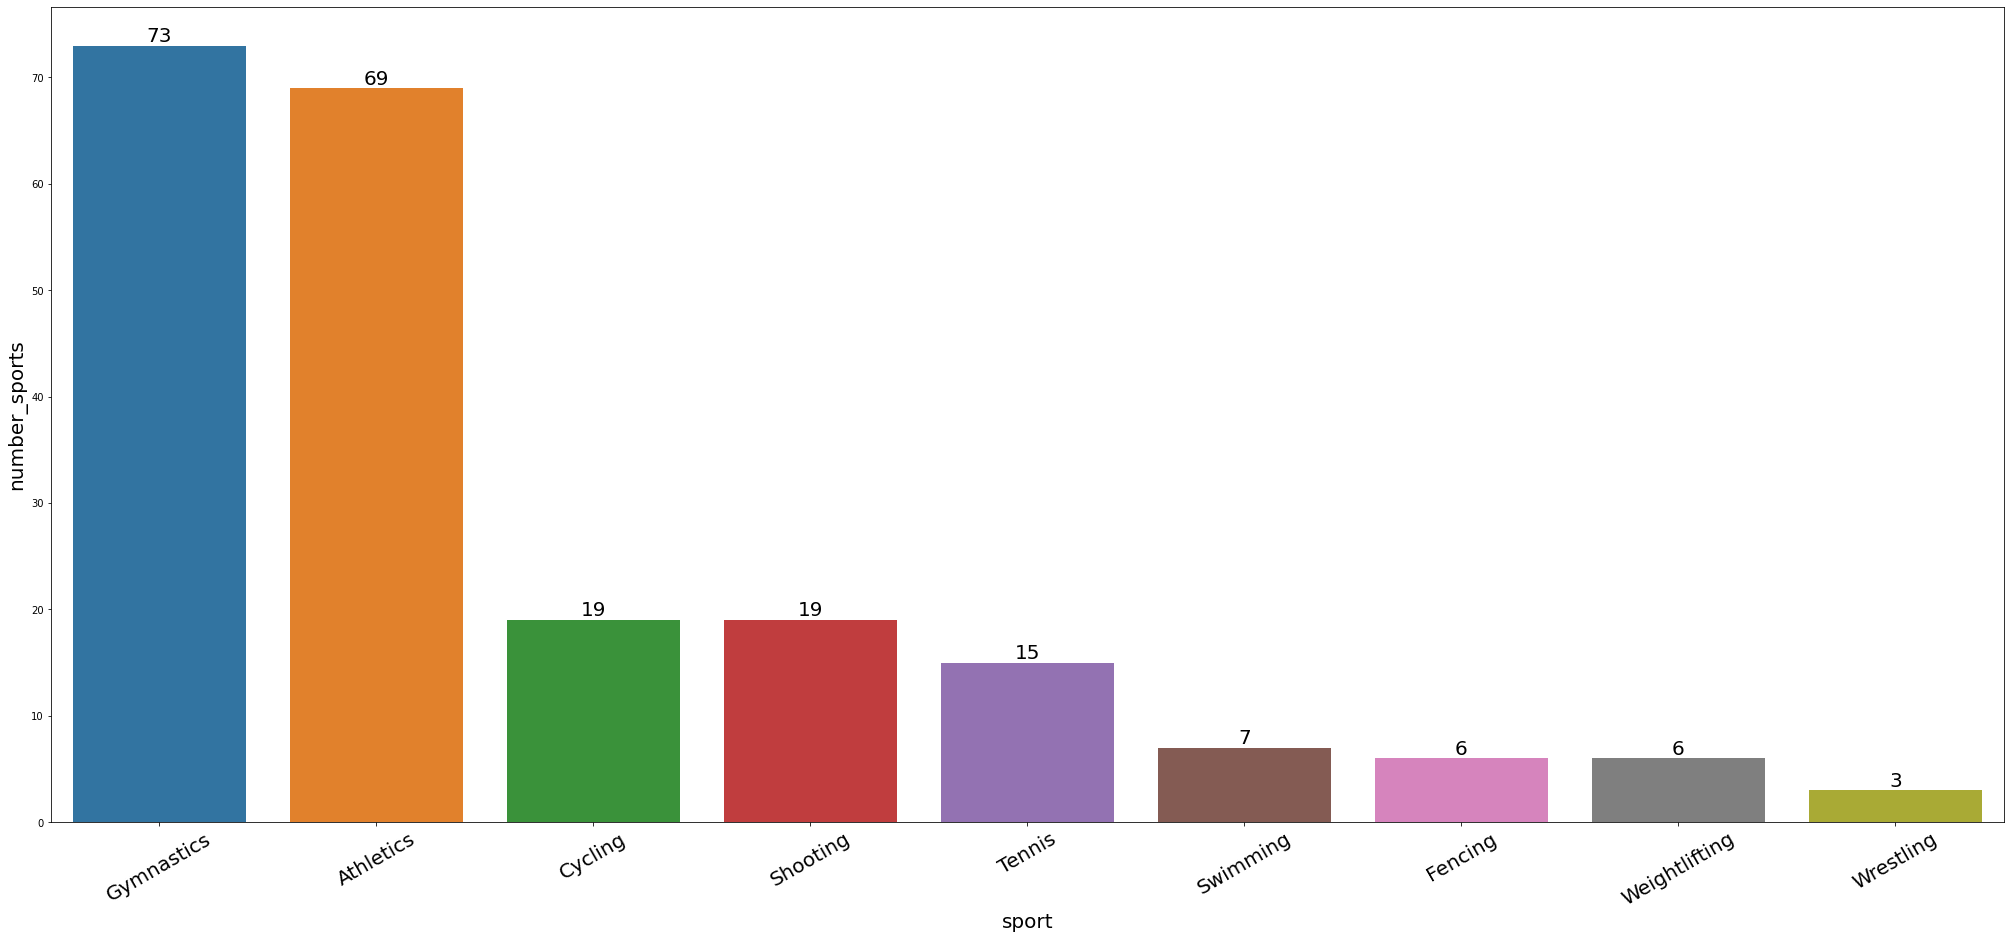

In [20]:
plt.figure(figsize=(35,15))
ax=sns.barplot(x = 'sport', y = 'number_sports', data=olympics_data)
plt.xlabel("sport",fontsize=20)
plt.ylabel("number_sports",fontsize=20)
ax = ax.bar_label(ax.containers[0],fontsize=20)
ax = plt.xticks(rotation = 30,fontsize=20)

In [21]:
# plt.figure(figsize=(35,15))
# ax=sns.countplot(x='sport',data=olympics_data,ec="black",order=olympics_data["sport"].value_counts().index)
# ax = ax.bar_label(ax.containers[0],fontsize=20)
# plt.ylabel("Count", weight="bold", fontsize=20)
# plt.xlabel("Sport", weight="bold", fontsize=20)
# plt.xticks(rotation = 40,fontsize=20)

### Observation:
- Found that oldest year of olympics is is **1896**.
- Gymnastics has highest number of participation i.e **73** in the year 1896.


#### Q.2 Find the latest year of olympics and and find count of countries played in that year ?


In [22]:
# query = '''
#             SELECT 
#                 Name AS name,
#                 Sex AS sex,
#                 Team AS country,
#                 Year AS year,
#                 Season As season,
#                 Sport AS sport
#             FROM 
#                 Olympics.olympics_history 
#             WHERE 
#                 Year = (SELECT 
#                             max(Year)
#                         FROM Olympics.olympics_history
#                         )
#         '''

In [23]:
query = '''
        WITH min_year_data AS (
            SELECT 
                Name AS name,
                Sex AS sex,
                Team AS country,
                Year AS year,
                Season AS season,
                Sport AS sport
            FROM
                Olympics.olympics_history
            WHERE
                Year = (SELECT MAX(Year) FROM Olympics.olympics_history)
        )
        SELECT
            sport,
            COUNT(*) AS number_sports
        FROM
            min_year_data
        GROUP BY 1
        ORDER BY 2 desc
        '''

In [24]:
olympics_data = pd.read_sql_query(query, mydb)

In [25]:
olympics_data

,sport,number_sports
0,Athletics,2507
1,Swimming,1568
2,Gymnastics,861
3,Cycling,667
4,Shooting,555
5,Rowing,550
6,Football,473
7,Canoeing,441
8,Hockey,390
9,Judo,389


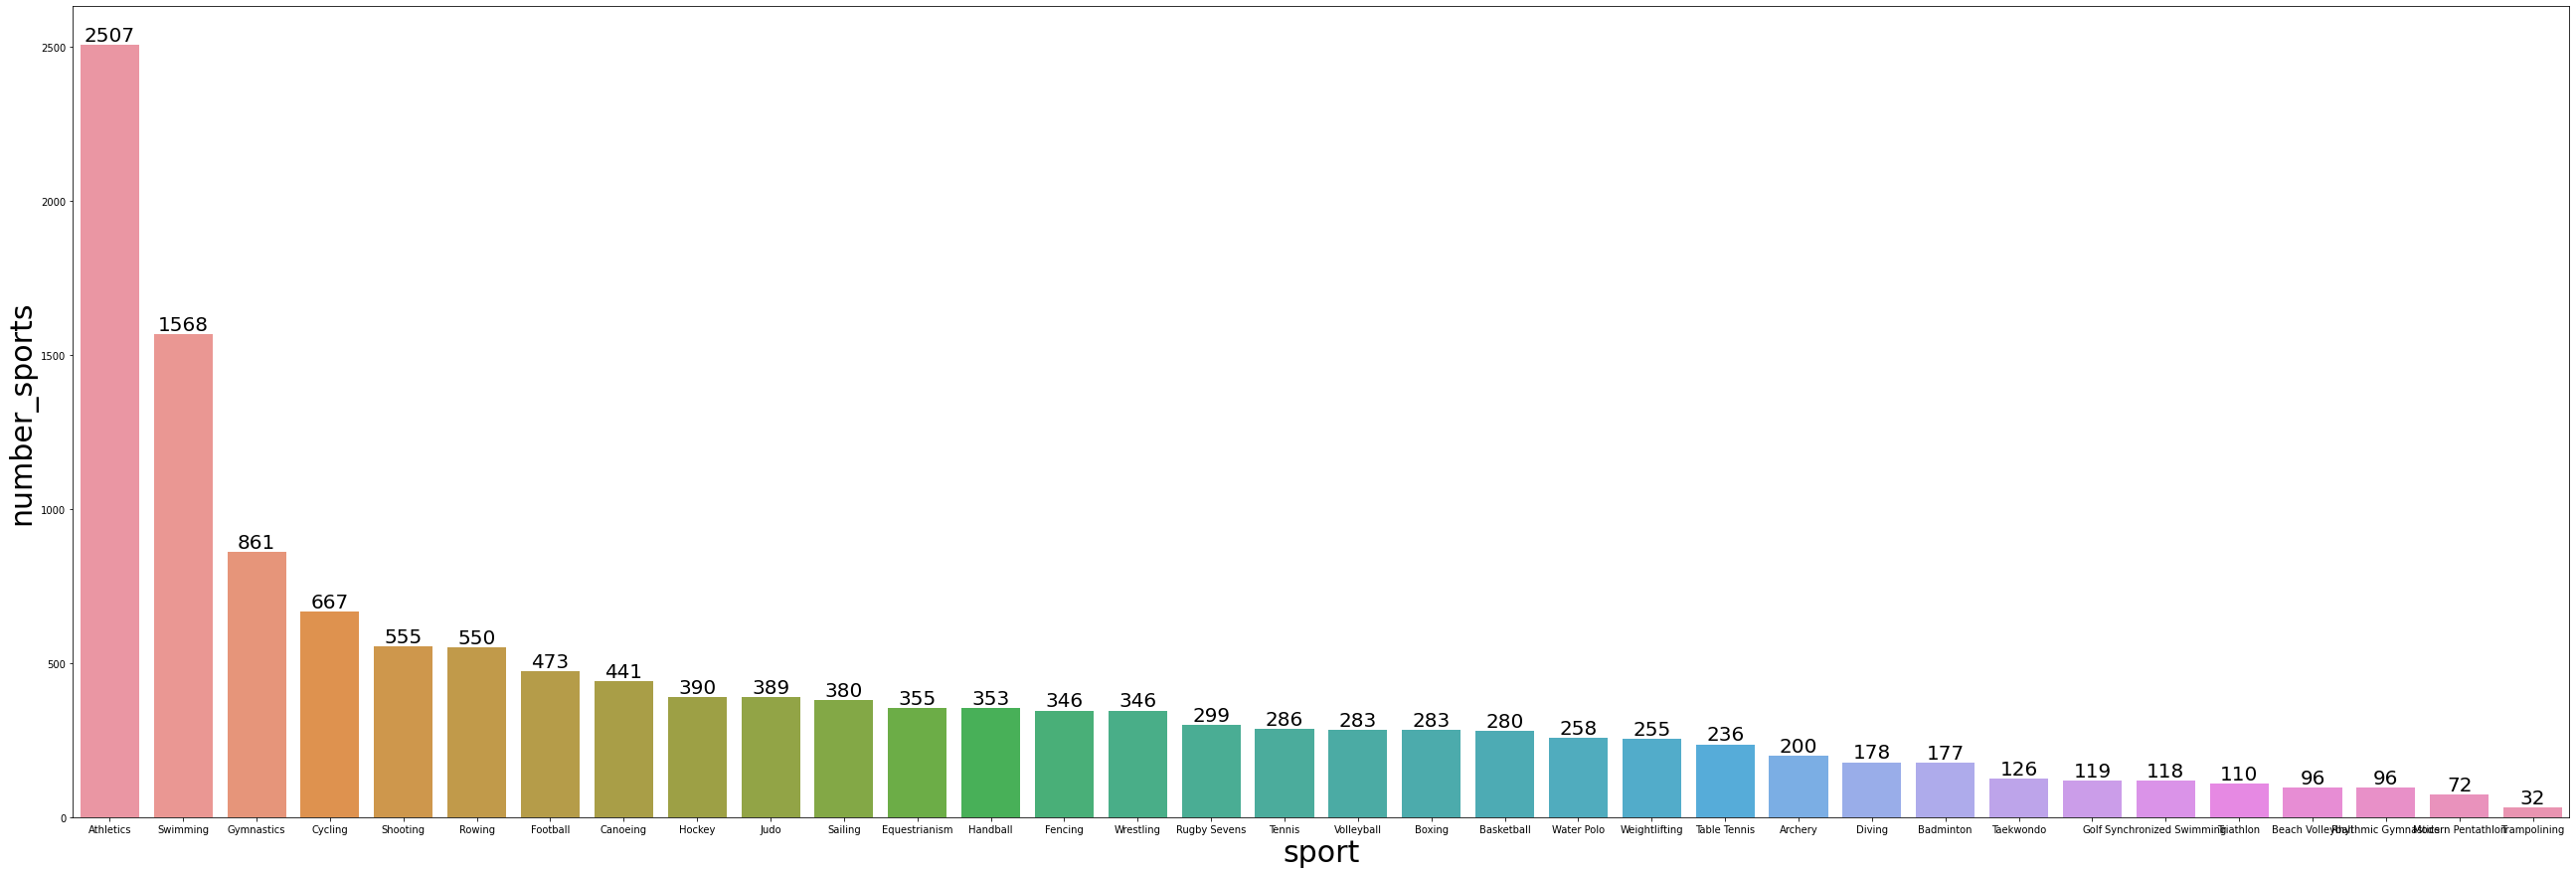

In [28]:
plt.figure(figsize=(45,15))
ax=sns.barplot(x = 'sport', y = 'number_sports', data=olympics_data)
plt.xlabel("sport",fontsize=30)
plt.ylabel("number_sports",fontsize=30)
ax = ax.bar_label(ax.containers[0],fontsize=20)

In [134]:
# plt.figure(figsize=(35,15))
# ax=sns.countplot(x='sport',data=olympics_data,ec="black",order=olympics_data["sport"].value_counts().index)
# ax = ax.bar_label(ax.containers[0],fontsize=20)
# plt.ylabel("Count", weight="bold", fontsize=20)
# plt.xlabel("Sport", weight="bold", fontsize=20)
# plt.xticks(rotation = 40,fontsize=20)

# hide this array result by storing final output into variable.

### Observation:
- Found that latest year of Olympics is 2016.
- Athletics has highest number of participation i.e. **2507** in the year 2016.


#### Q.3 Which year saw the highest and lowest no of countries participating in olympics?

In [135]:
query = '''
WITH join_tables AS (
    SELECT
        olympics_history.Games as year,
        COUNT(DISTINCT olympics_history_noc_regions.region) AS Country_region
    FROM
        Olympics.olympics_history
    LEFT JOIN Olympics.olympics_history_noc_regions
    ON olympics_history.noc=olympics_history_noc_regions.noc
    GROUP BY 1
),
highest_lowest_count_row AS
(
    (
        SELECT
            * 
        FROM 
            join_tables
        ORDER BY 
            Country_region ASC 
        LIMIT 1
    )
UNION ALL
    (
        SELECT
            * 
        FROM 
            join_tables
        ORDER BY 
            Country_region DESC 
        LIMIT 1
    )
)
SELECT 
    * 
FROM 
    highest_lowest_count_row
'''

In [136]:
olympics_data = pd.read_sql_query(query, mydb)

In [137]:
olympics_data

,year,Country_region
0,1896 Summer,11
1,2016 Summer,204


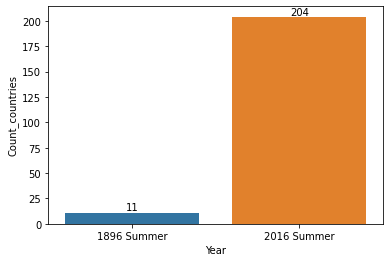

In [114]:
plt.figure(figsize=(6,4))
ax=sns.barplot(x = 'year', y = 'Country_region', data=olympics_data)
plt.xlabel("Year")
plt.ylabel("Count_countries")
ax = ax.bar_label(ax.containers[0])

#### Observation
- 1896 Summer olympics games has lowest count of 11 nations participating in an Olympic games.
- 2016 Summer olympics games has highest count of 204 nations participating in an Olympic games.

#### Q.4 Which nation has participated in all of the olympic games.

In [36]:
query = '''
WITH join_table AS
(
    SELECT
        olympics_history.Games AS games,
        olympics_history_noc_regions.region AS country_regions
    FROM
        Olympics.olympics_history
    LEFT JOIN Olympics.olympics_history_noc_regions
    ON olympics_history.noc=olympics_history_noc_regions.noc
),
total_games AS
(
    SELECT
        COUNT(DISTINCT games) AS total_games_olympics
    FROM
        join_table
),
total_games_countries AS
(
    SELECT
        country_regions,
        COUNT(DISTINCT games) AS total_games_country
    FROM
        join_table
    GROUP BY 1
)
SELECT 
    country_regions,
    total_games_country 
FROM 
    total_games_countries
JOIN 
    total_games 
ON total_games.total_games_olympics=total_games_countries.total_games_country

'''

In [37]:
olympics_data = pd.read_sql_query(query, mydb)

In [38]:
olympics_data

,country_regions,total_games_country
0,Switzerland,51
1,UK,51


#### Observation:
- There are total 51 games played in all olympic games.
- Switzerland and UK are the only countries which participated in all olympic games.


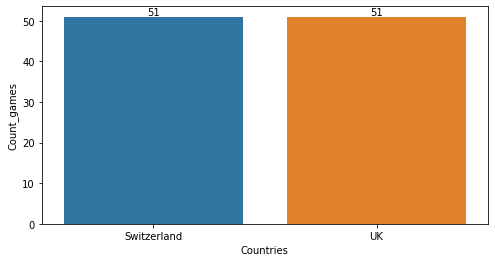

In [39]:
plt.figure(figsize=(8,4))
ax=sns.barplot(x = 'country_regions', y = 'total_games_country', data=olympics_data)
plt.xlabel("Countries")
plt.ylabel("Count_games")
ax = ax.bar_label(ax.containers[0])

#### Q.5 Identify the sport which was played in all summer olympics. 

In [40]:
query ='''
WITH count_summer_olympics AS
(
    SELECT
        COUNT(DISTINCT Games) AS olympics_year_count
    FROM
        Olympics.olympics_history
    WHERE 
        games LIKE '%Summer%'
),
sports_count_name AS
(
SELECT
    Sport,
    Games
FROM
    Olympics.olympics_history
WHERE 
    games LIKE '%Summer%'
),
total_sports_count AS
(
SELECT
    Sport AS sport,
    COUNT(DISTINCT Games) AS sport_number_count
FROM
    Olympics.olympics_history
GROUP BY Sport
)
SELECT 
    sport,
    sport_number_count
FROM 
    total_sports_count
'''

In [41]:
olympics_data = pd.read_sql_query(query, mydb)

In [42]:
olympics_data

,sport,sport_number_count
0,Aeronautics,1
1,Alpine Skiing,19
2,Alpinism,3
3,Archery,16
4,Art Competitions,7
...,...,...
61,Tug-Of-War,6
62,Volleyball,14
63,Water Polo,27
64,Weightlifting,26


<Axes: >

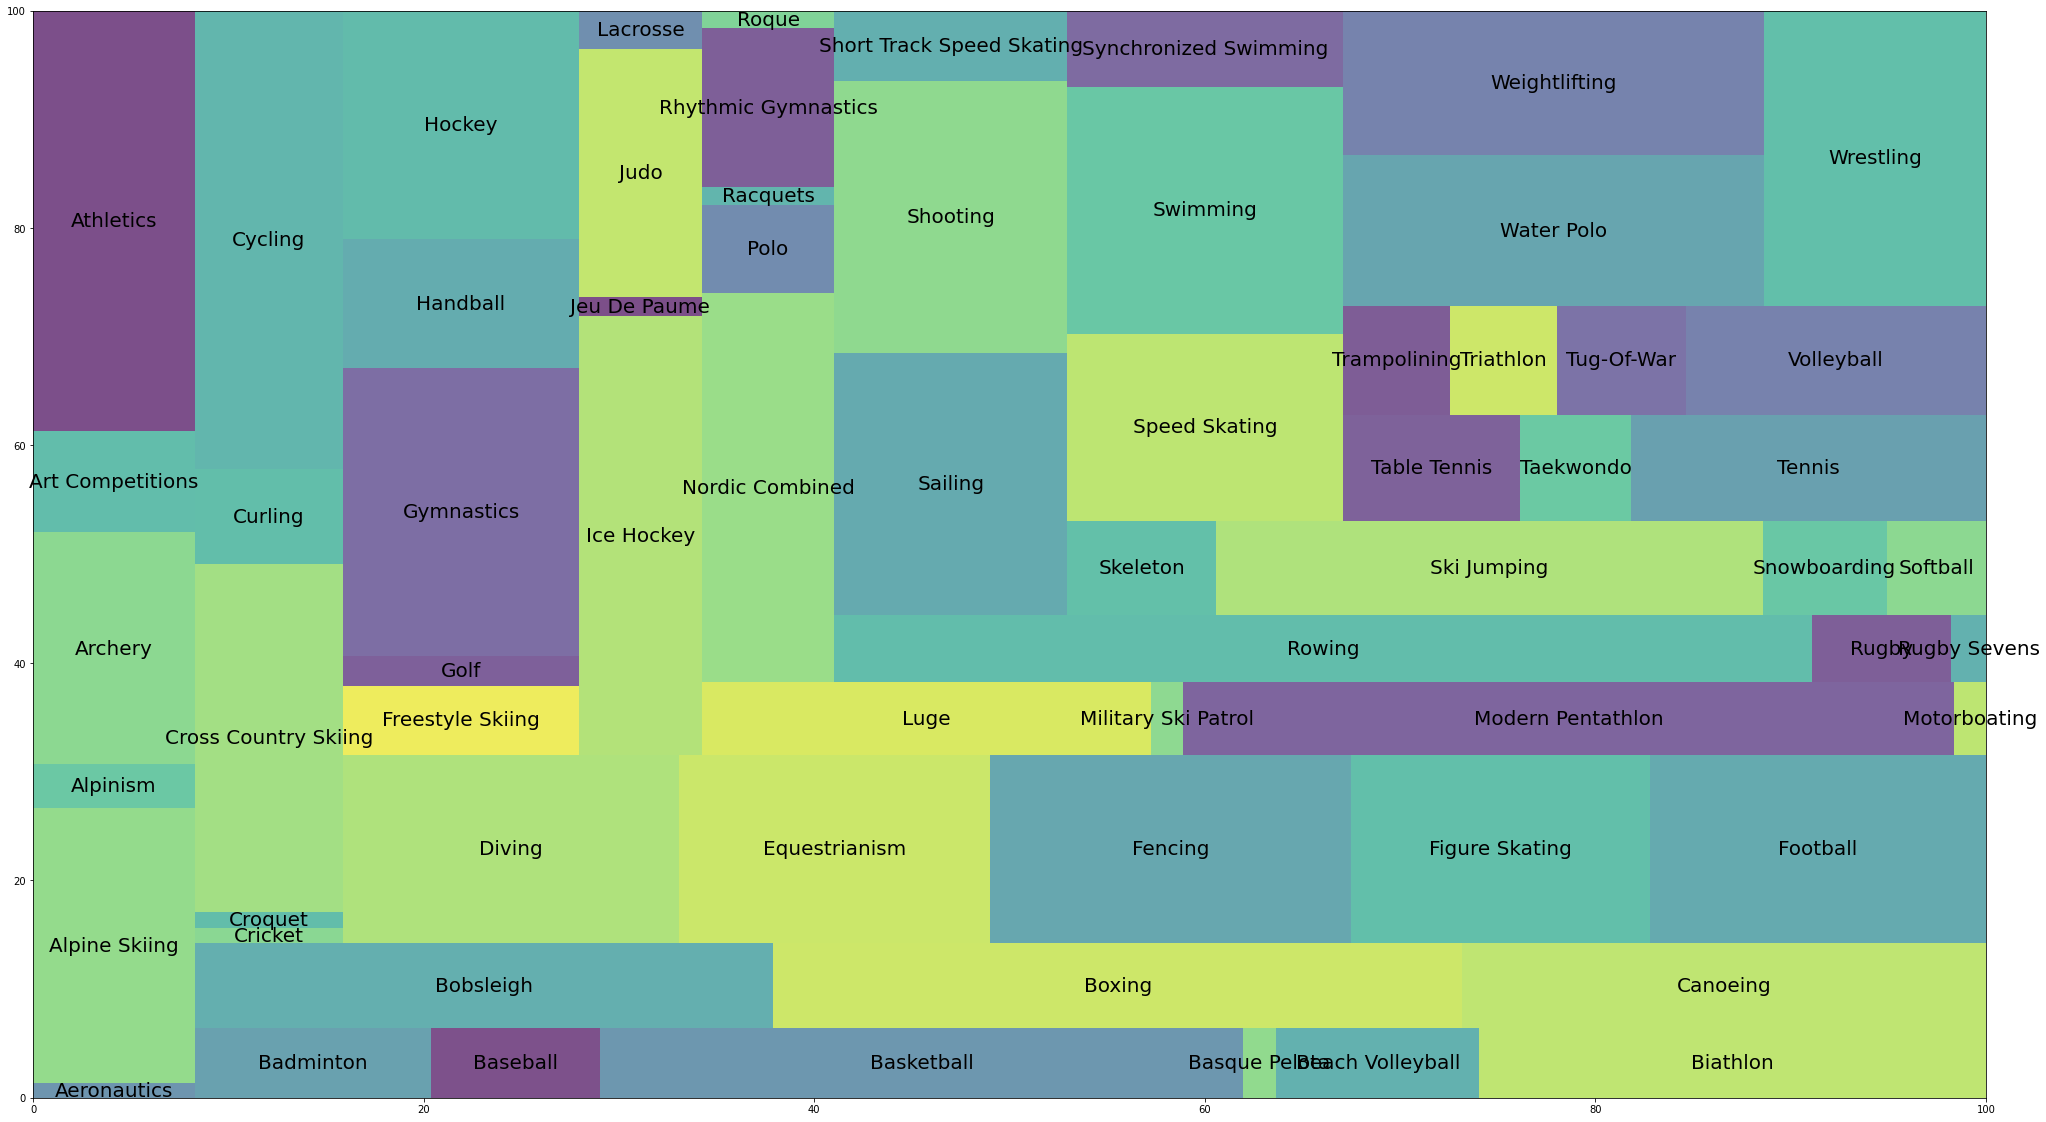

In [54]:
plt.figure(figsize=(35,20))
squarify.plot(sizes=olympics_data['sport_number_count'], label=olympics_data['sport'], alpha=.7, text_kwargs={'fontsize':20} )

#### Q.6. Which Sports were just played only once in the olympics.

In [57]:
query='''
WITH olympic_history_cte AS (
    SELECT
        sport,
        Games AS games
    FROM 
        Olympics.olympics_history
),
count_number_sports AS (
    SELECT
        sport,
        COUNT(DISTINCT games) AS number_of_played_games
    FROM olympic_history_cte
    GROUP BY 1
)
SELECT
    sport,
    number_of_played_games
FROM
    count_number_sports
WHERE 
    number_of_played_games = 1
ORDER BY 2 asc
'''

In [58]:
olympics_data = pd.read_sql_query(query, mydb)

In [59]:
olympics_data

,sport,number_of_played_games
0,Aeronautics,1
1,Basque Pelota,1
2,Cricket,1
3,Croquet,1
4,Jeu De Paume,1
5,Military Ski Patrol,1
6,Motorboating,1
7,Racquets,1
8,Roque,1
9,Rugby Sevens,1


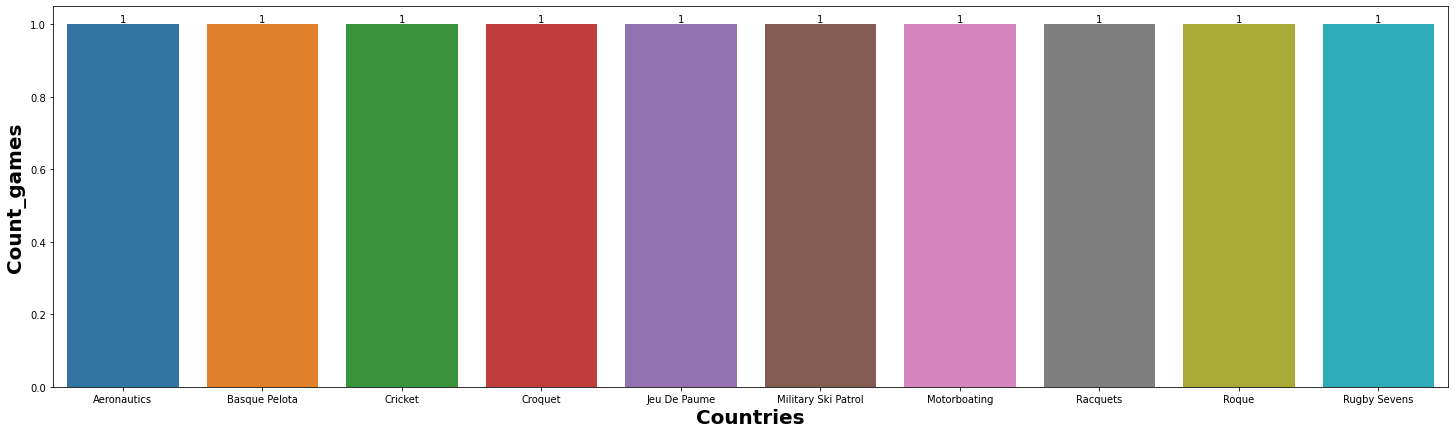

In [60]:
plt.figure(figsize=(25,7))


ax=sns.barplot(x = 'sport', y = 'number_of_played_games', data=olympics_data)
plt.xlabel("Countries",weight="bold", fontsize=20)
plt.ylabel("Count_games",weight="bold", fontsize=20)
ax = ax.bar_label(ax.containers[0])

### Observation:
- Aeronautics,Basque Pelota,Cricket,Croquet,Jeu De Paume,Military Ski Patrol,Motorboating,Racquets,Roque,Rugby Sevens are the games which are only played once in the olympics.
- Number of athletes participated in mentioned games were in less count.Hence sports count was 1 in the dataset. 

#### Q.7  Fetch oldest athletes olympic year to win a gold medal?
- oldest atheltes? - they gave olympic year right? correct question if so.


In [61]:
query='''
WITH olympics_cte AS
(
    SELECT
        name,
        sex,
        CASE WHEN age = 'NA' then '0' ELSE age END AS age,
        team,
        Games AS games,
        city,
        Sport AS sport,
        event,
        medal
    FROM
        Olympics.olympics_history
),
ranking as
(
    SELECT
        * ,
        DENSE_RANK() OVER( ORDER BY age DESC) AS age_rnk
    FROM
        olympics_cte
    WHERE 
        MEDAL = 'Gold' 
)
SELECT
    *
FROM
    ranking
WHERE
    age_rnk=1

'''

In [62]:
olympics_data = pd.read_sql_query(query, mydb)

In [63]:
olympics_data

,name,sex,age,team,games,city,sport,event,medal,age_rnk
0,Oscar Gomer Swahn,M,64,Sweden,1912 Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold,1
1,Charles Jacobus,M,64,United States,1904 Summer,St. Louis,Roque,Roque Men's Singles,Gold,1


#### Observation:
- Oscar Gomer Swahn won oldest Gold medal in 1912 Summer olympics games for shooting at the age of 64.
- Charles Jacobus won oldest Gold medal in 1904 Summer olympics games for Roque at the age of 64.

#### Q.8 Fetch the top 5 athletes who have won the most medals (gold/silver/bronze). 

In [64]:
query='''
WITH olympics_cte AS
(
    SELECT
        name,
        team,
        medal
    FROM Olympics.olympics_history
),
total_medal_cte AS
(
SELECT
    name,
    team,
    COUNT(medal) AS medal_count
FROM 
    olympics_cte
GROUP BY 
    1,2
ORDER BY 
    medal_count
),
top_five_athletes AS
(
    SELECT 
        *,
        DENSE_RANK() OVER(ORDER BY medal_count desc) AS top_5_medal_count
    FROM 
        total_medal_cte
)
SELECT 
    * 
FROM 
    top_five_athletes
WHERE 
    top_5_medal_count <=5 ;

'''

In [65]:
olympics_data = pd.read_sql_query(query, mydb)

In [66]:
olympics_data

,name,team,medal_count,top_5_medal_count
0,Robert Tait McKenzie,Canada,58,1
1,Heikki Ilmari Savolainen,Finland,39,2
2,"Joseph ""Josy"""" Stoffel""",Luxembourg,38,3
3,Takashi Ono,Japan,33,4
4,Alfrd (Arnold-) Hajs (Guttmann-),Hungary,32,5
5,Jean Lucien Nicolas Jacoby,Luxembourg,32,5


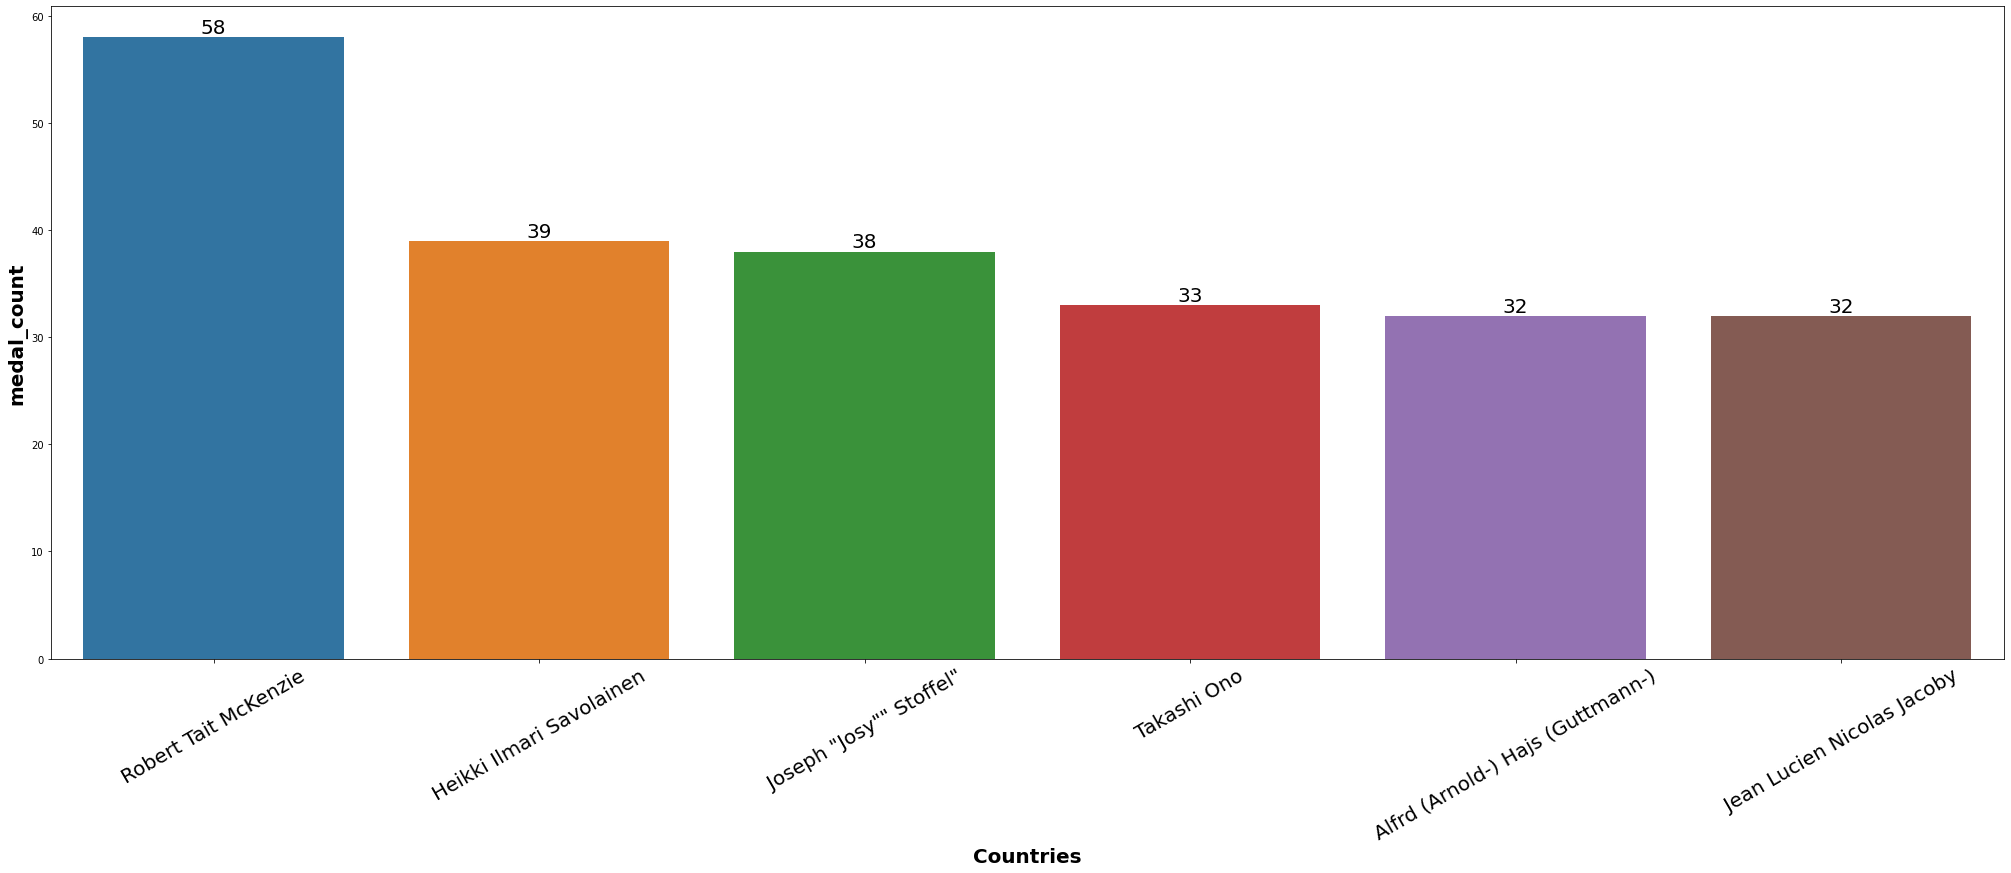

In [68]:
plt.figure(figsize=(35,12))
ax=sns.barplot(x = 'name', y = 'medal_count', data=olympics_data)
plt.xlabel("Countries",fontsize=20,weight="bold")
plt.ylabel("medal_count",fontsize=20,weight="bold")
ax = ax.bar_label(ax.containers[0],fontsize=20)
ax = plt.xticks(rotation = 30,fontsize=20)

#### Observation
- **Robert Tait** have won most of the medals with the count of **58** while **Alferd and Jean** have won least medals with the count of **32**.

#### Q.9 Fetch the top 5 most successful countries in olympics. Success is defined by no of medals won.

In [69]:
query='''
WITH join_tables_cte AS(
    SELECT
        olympics_history_noc_regions.region AS region,
        olympics_history.medal AS medal_cnt
    FROM
        Olympics.olympics_history
    LEFT JOIN
        Olympics.olympics_history_noc_regions
    ON
        olympics_history_noc_regions.noc=olympics_history.noc
    WHERE 
        medal <> 'NA'
),
medal_count_cte AS(
    SELECT
        region,
        COUNT(medal_cnt) AS medal_count
    FROM 
        join_tables_cte
    GROUP BY 
        region
),
top_five_countries_cte AS(
SELECT 
    *,
    DENSE_RANK() OVER (ORDER BY medal_count DESC) AS rnk
FROM
    medal_count_cte
)
SELECT 
    * 
FROM 
    top_five_countries_cte
WHERE 
    rnk <=5;
'''

In [70]:
olympics_data = pd.read_sql_query(query, mydb)

In [71]:
olympics_data

,region,medal_count,rnk
0,USA,5392,1
1,Russia,3942,2
2,Germany,3719,3
3,UK,1963,4
4,France,1681,5


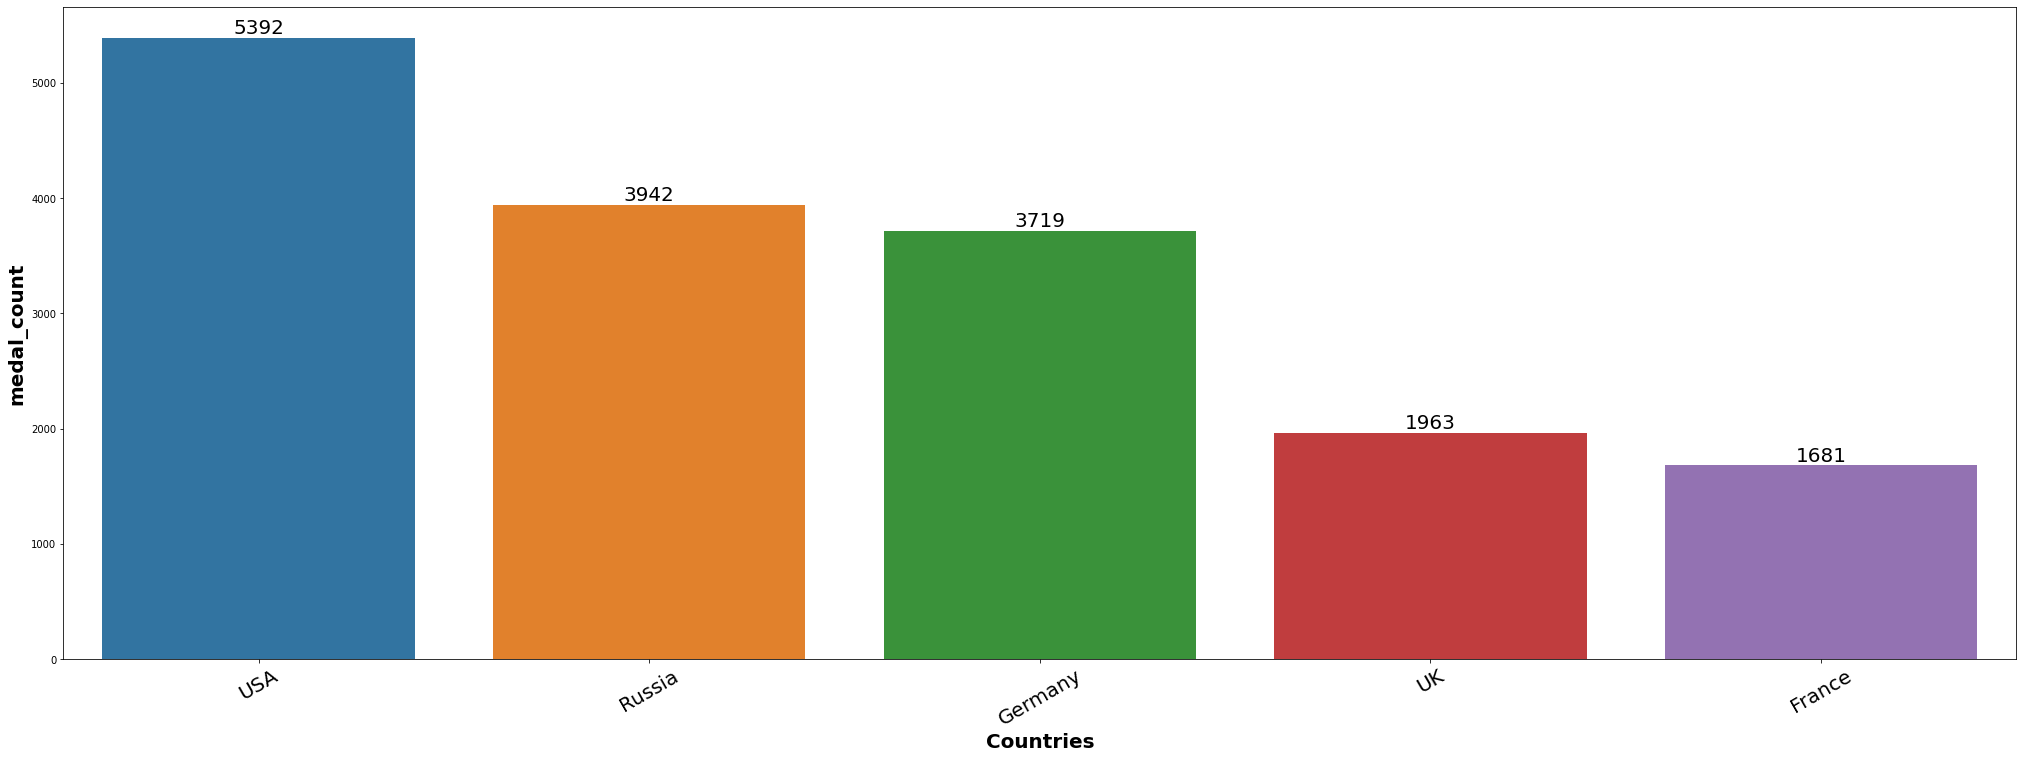

In [72]:
plt.figure(figsize=(35,12))
ax=sns.barplot(x = 'region', y = 'medal_count', data=olympics_data)
plt.xlabel("Countries",fontsize=20,weight="bold")
plt.ylabel("medal_count",fontsize=20,weight="bold")
ax = ax.bar_label(ax.containers[0],fontsize=20)
ax = plt.xticks(rotation = 30,fontsize=20)

In [81]:
olympics_data= olympics_data.set_index('region')

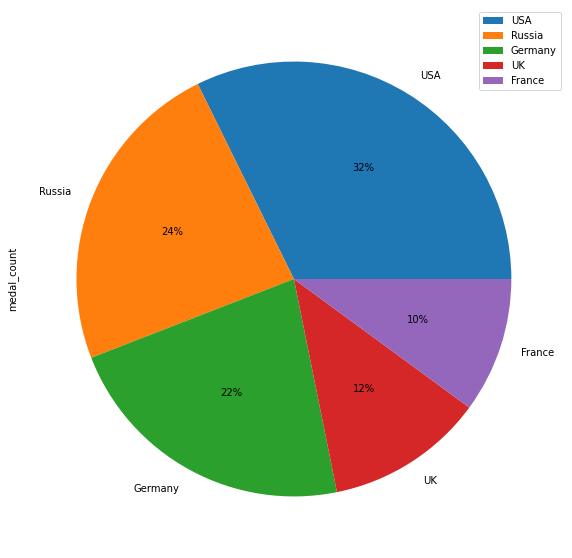

In [85]:

plot = olympics_data.plot.pie(y='medal_count', figsize=(10, 10),  autopct='%.0f%%')

#### Obsevation:
- **USA** has highest number of medals i.e. **5392** and **France** has least number of medals i.e. **1681**.


#### Q.10 In which Sport/event, India has won highest medals.

In [86]:
query='''
WITH medal_count AS (
    SELECT
        Sport,
        COUNT(medal) AS medal_cnt
    FROM
        Olympics.olympics_history
    WHERE 
        team='India' 
        AND medal <> 'NA'
    GROUP BY 1
    ORDER BY 
        medal_cnt
),

high_medal_cnt AS
(
    SELECT 
        * ,
        ROW_NUMBER () OVER ( ORDER BY medal_cnt desc) AS rnk
    FROM 
        medal_count
)
SELECT 
    Sport, 
    medal_cnt 
FROM 
    high_medal_cnt
WHERE 
    rnk=1;

'''

In [87]:
olympics_data = pd.read_sql_query(query, mydb)

In [88]:
olympics_data

,Sport,medal_cnt
0,Hockey,161


#### Observation:
- India has won most of medals in **Hockey** Sport with the count of **161**.

#### Q.10 Break down all olympic games where India won medal for Hockey and how many medals in each olympic games.

In [89]:
query='''
WITH medal_count_cte AS (
    SELECT
        team,
        Games AS games,
        Sport AS sport,
        COUNT(MEDAL) AS total_medals
    FROM
        Olympics.olympics_history
    WHERE 
        team='India' 
        AND medal <> 'NA' 
        AND sport='Hockey'
    GROUP BY 1,2,3
    ORDER BY 
        total_medals DESC
)
SELECT 
    * 
FROM medal_count_cte
'''

In [90]:
olympics_data = pd.read_sql_query(query, mydb)

In [91]:
olympics_data

,team,games,sport,total_medals
0,India,1936 Summer,Hockey,18
1,India,1980 Summer,Hockey,16
2,India,1968 Summer,Hockey,16
3,India,1948 Summer,Hockey,16
4,India,1956 Summer,Hockey,16
5,India,1964 Summer,Hockey,15
6,India,1972 Summer,Hockey,14
7,India,1952 Summer,Hockey,14
8,India,1960 Summer,Hockey,13
9,India,1928 Summer,Hockey,12


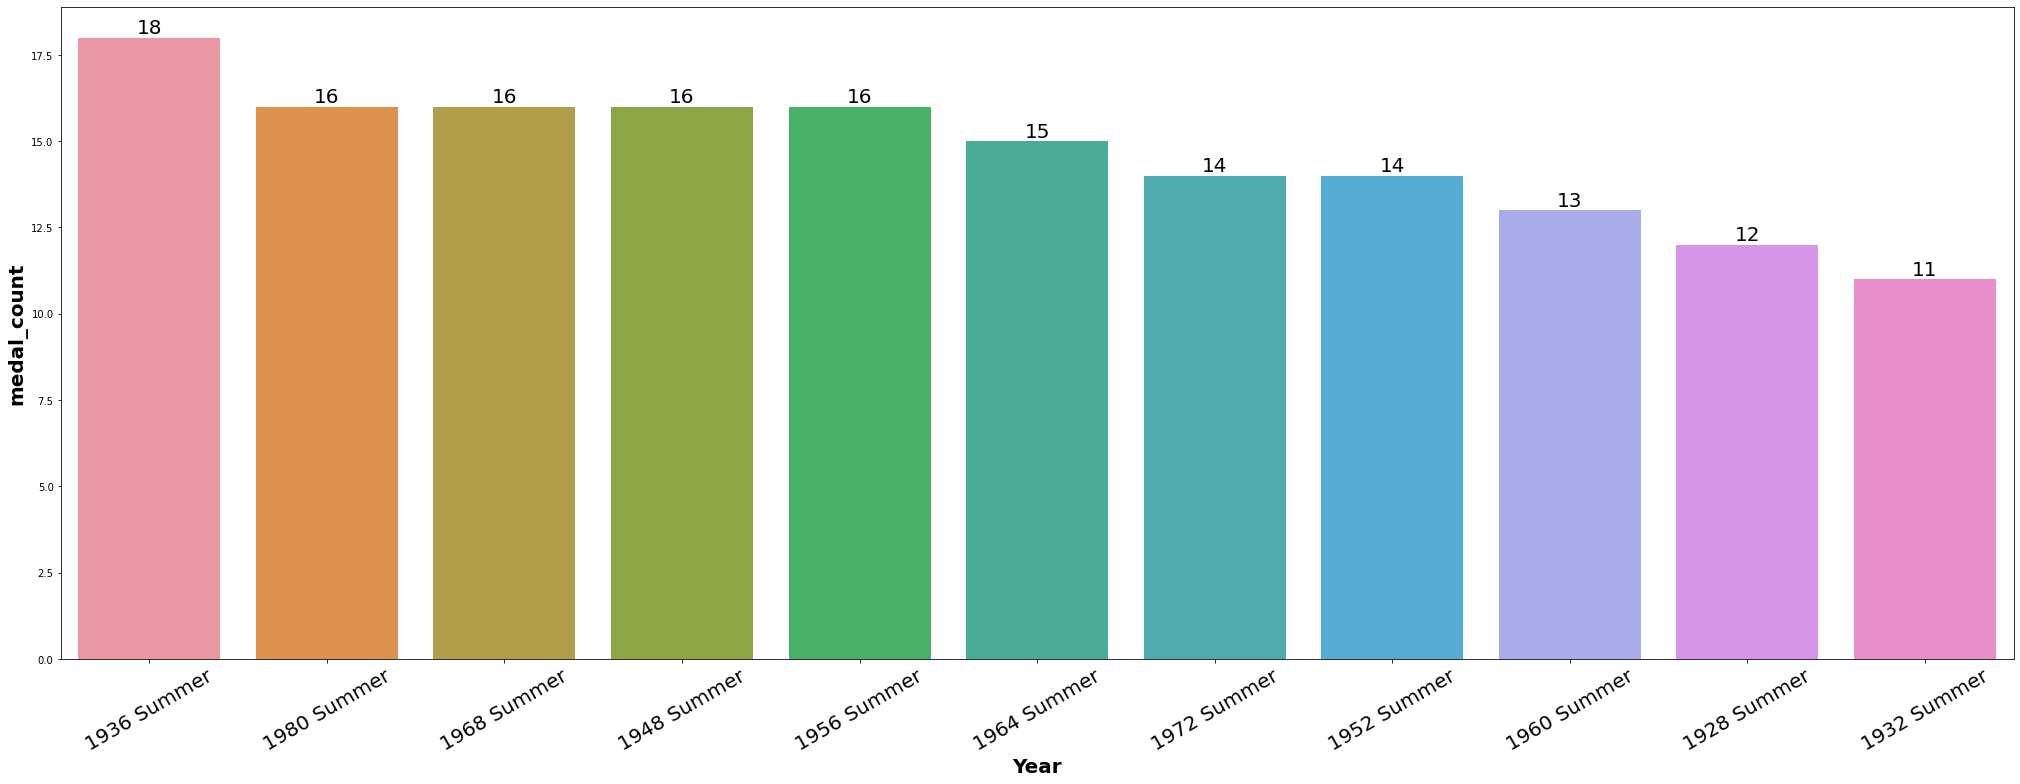

In [93]:
plt.figure(figsize=(35,12))
ax=sns.barplot(x = 'games', y = 'total_medals', data=olympics_data)
plt.xlabel("Year",fontsize=20,weight="bold")
plt.ylabel("medal_count",fontsize=20,weight="bold")
ax = ax.bar_label(ax.containers[0],fontsize=20)
ax = plt.xticks(rotation = 30,fontsize=20)

### Obsevation:
- India has won most of the medals i.e. **18** in 1936 Summer Olympics games  while least i.e. **11** in 1932 Summer Olympics games for Hockey.

#### Q.11 List top 15 down total gold, silver and bronze medals won by each country corresponding to each olympic games.

In [98]:
query='''
WITH join_tables_cte AS (
    SELECT
        olympics_history.medal AS medal_won,
        olympics_history.Games AS games,
        olympics_history_noc_regions.region AS country
    FROM
        Olympics.olympics_history
    LEFT JOIN
        Olympics.olympics_history_noc_regions
    ON olympics_history.noc=olympics_history_noc_regions.noc
    WHERE 
        medal <> 'NA'
),
total_medal_cte AS
(
    SELECT
        country,
        medal_won,
        games,
        COUNT(medal_won) AS total_medals_count
    FROM
        join_tables_cte
    GROUP BY 
        country,
        medal_won,
        games
    ORDER BY 
        total_medals_count DESC
)
SELECT 
    * 
FROM 
    total_medal_cte 
LIMIT 15
'''

In [99]:
olympics_data = pd.read_sql_query(query, mydb)

In [100]:
olympics_data

,country,medal_won,games,total_medals_count
0,Russia,Gold,1980 Summer,187
1,USA,Gold,1984 Summer,177
2,USA,Gold,1996 Summer,152
3,USA,Gold,2012 Summer,145
4,USA,Gold,2016 Summer,138
5,UK,Gold,1908 Summer,138
6,Russia,Gold,1988 Summer,134
7,USA,Gold,2000 Summer,130
8,Russia,Silver,1980 Summer,129
9,USA,Gold,2008 Summer,127


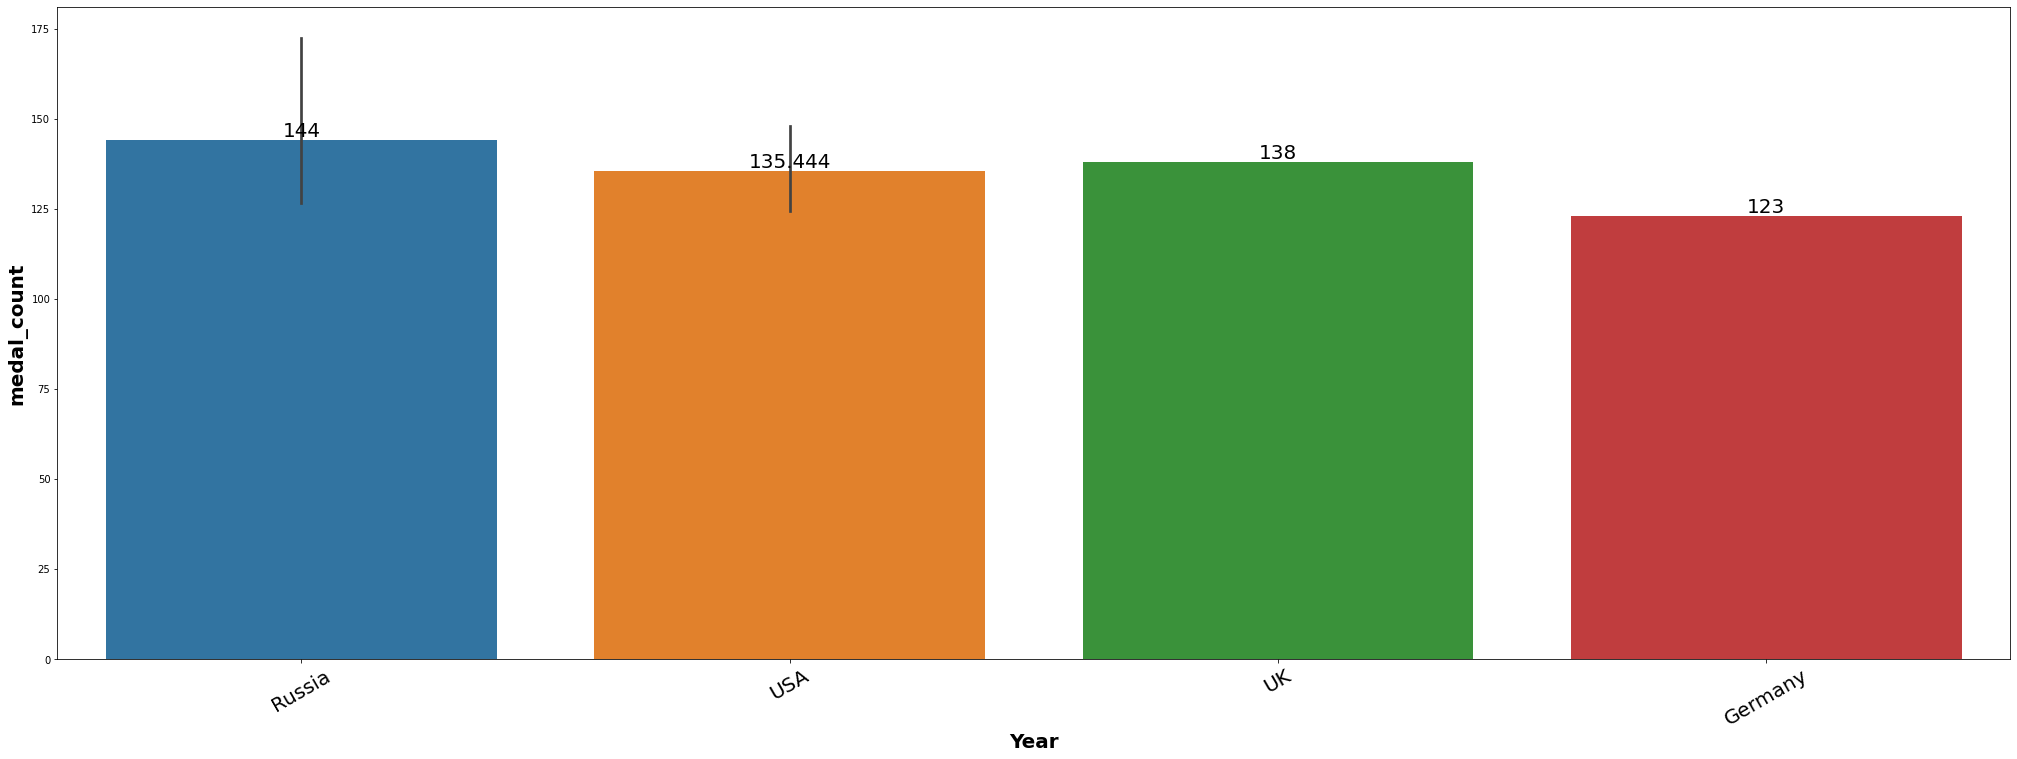

In [102]:
plt.figure(figsize=(35,12))
ax=sns.barplot(x = 'country', y = 'total_medals_count', data=olympics_data)
plt.xlabel("Year",fontsize=20,weight="bold")
plt.ylabel("medal_count",fontsize=20,weight="bold")
ax = ax.bar_label(ax.containers[0],fontsize=20)
ax = plt.xticks(rotation = 30,fontsize=20)

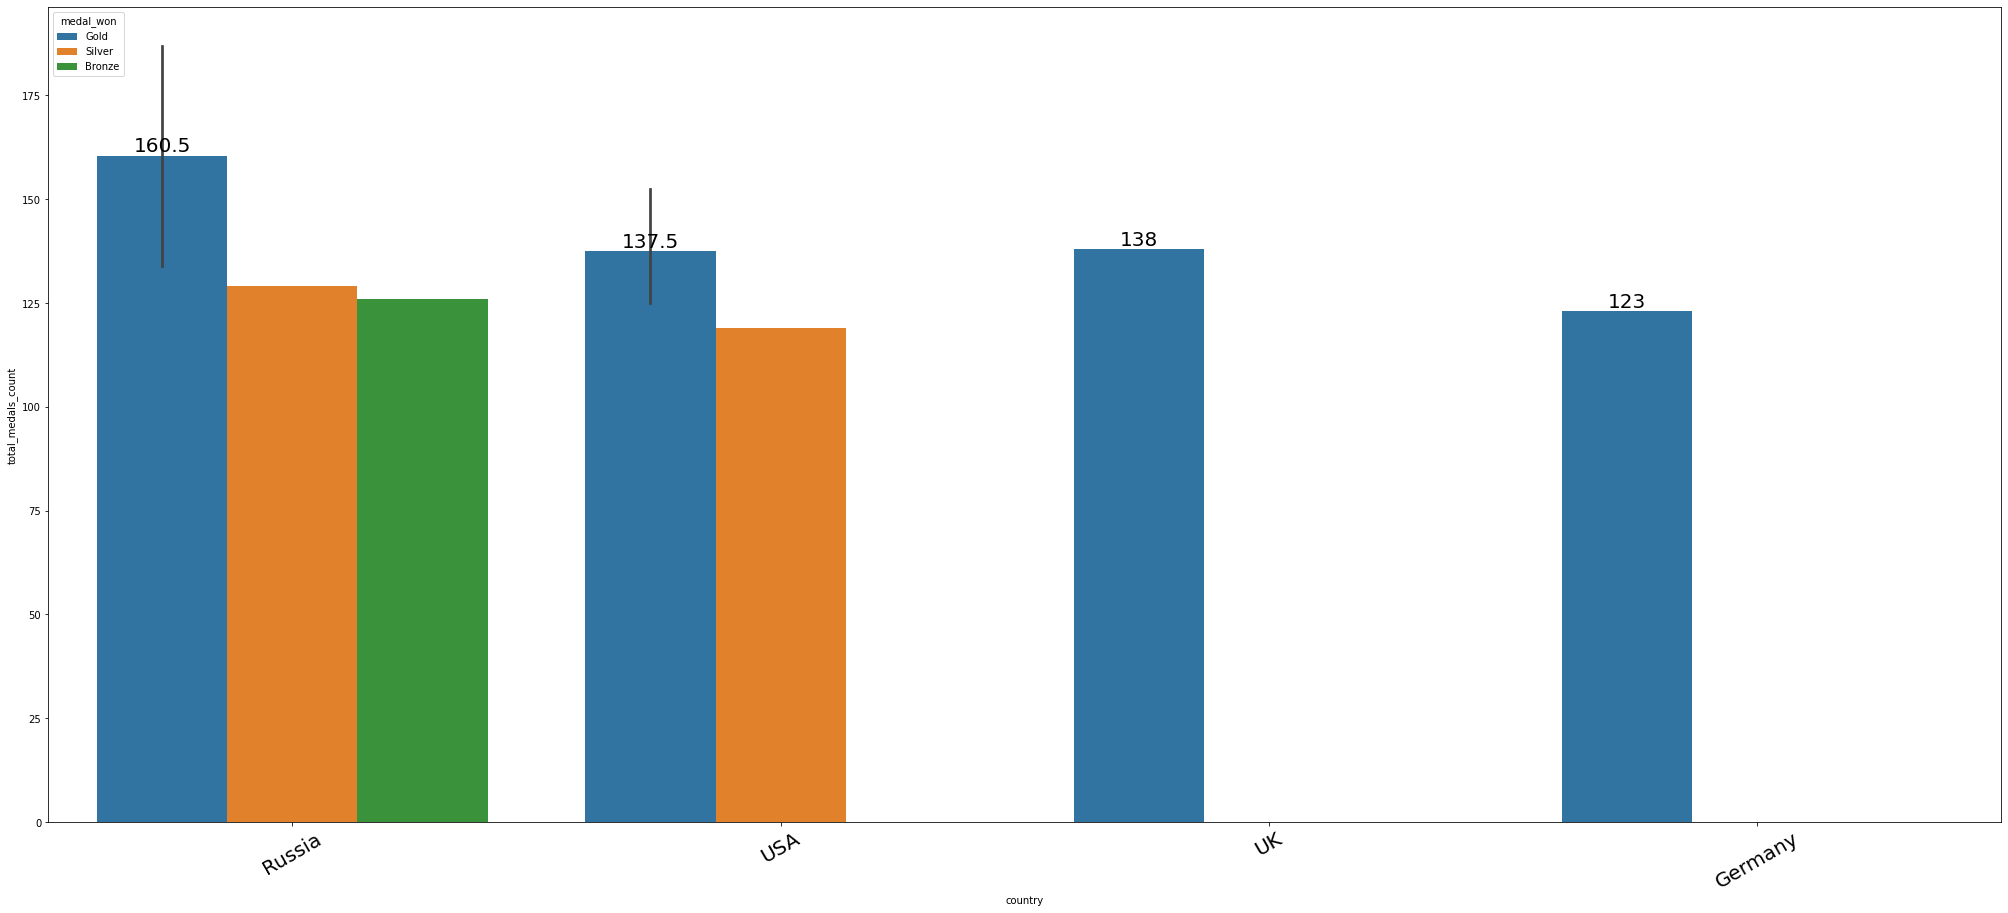

In [106]:
plt.figure(figsize=(35,15))
ax = sns.barplot(olympics_data, x='country', y='total_medals_count', hue='medal_won')
ax = ax.bar_label(ax.containers[0],fontsize=20)
ax = plt.xticks(rotation = 30,fontsize=20)

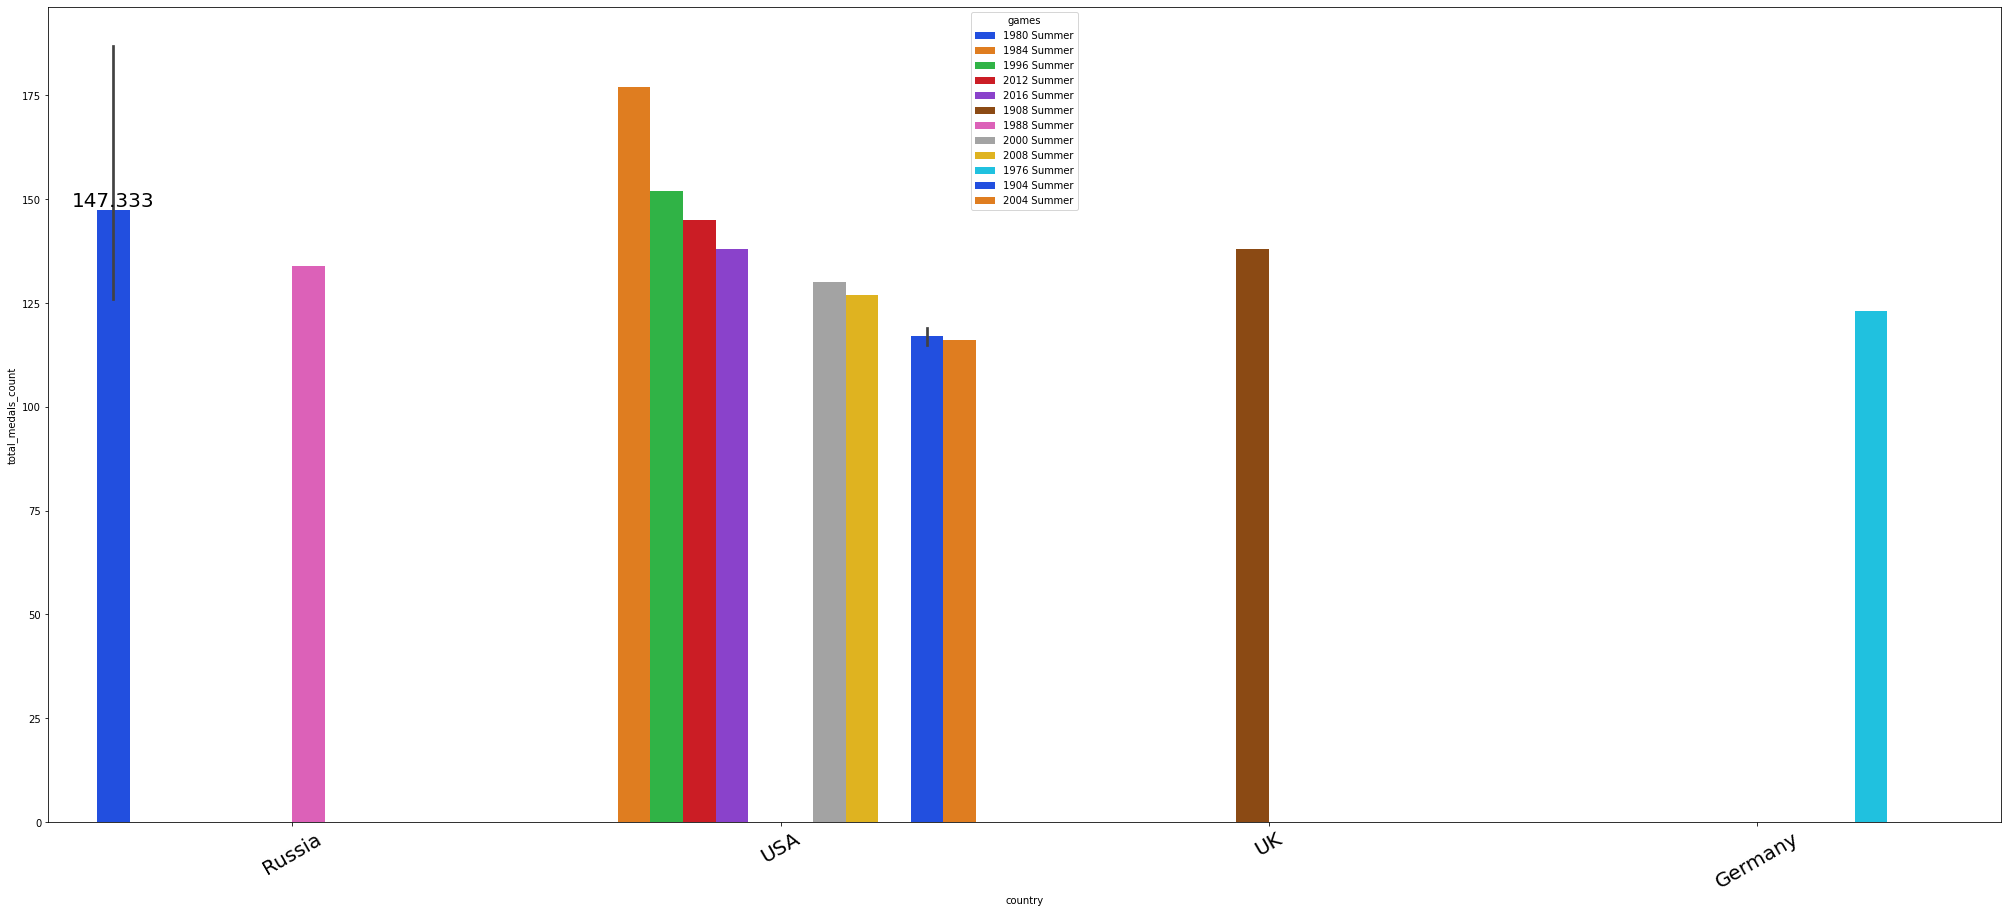

In [107]:
plt.figure(figsize=(35,15))
ax=sns.barplot(x='country', y='total_medals_count', hue='games', data=olympics_data, palette='bright')
ax = ax.bar_label(ax.containers[0],fontsize=20)
ax = plt.xticks(rotation = 30,fontsize=20)

### Observation:
- Russia has won most of the gold medals i.e. **187** in 1984 Summer Olympic games,while USA won least number of medals in 1904 Summer i.e. **115**.

- Very good overall good imporvement in projects.
- do one more project like this will help you to improve confidence in SQL
- I have gave you 45 questions list try if possible to write queries - it will take time but help you to improve knowledge
- i have updated changes to github for backup